In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-marks-dataset/Student_Marks.csv


MRM to predict student's marks based on study hours and number of courses. 

In [2]:
#Let us start with reading the data
df = pd.read_csv('../input/student-marks-dataset/Student_Marks.csv')

In [3]:
df.info()
# no null values a relief

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


**Data Description and Select an approach** We will use multiple regression to show how combination of study hours and number of courses effect the marks of a student. We will check the scatter plot and the correlation matrix.

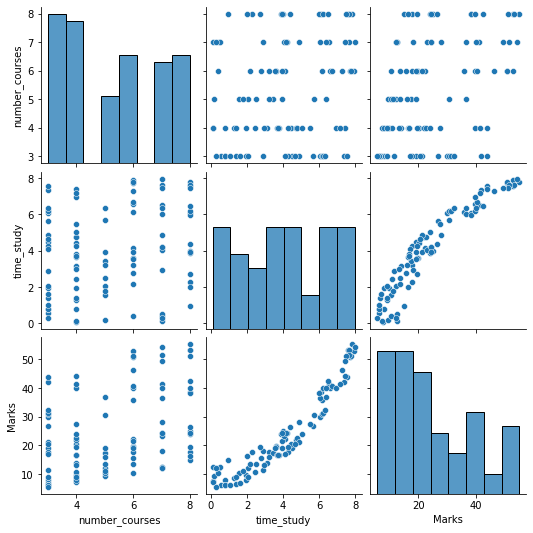

In [4]:
import seaborn as sns
sns.pairplot(df)

From scatterplots, we identify there is linear realtionship in explainatory variable and responce variable.


In [5]:
df.corr()

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


From the coorelation matrix, the corr(time_study,number_course) = 0.20. VIF = 1.05

**Analysis Part** 

In [6]:

import statsmodels.formula.api as smf
import pandas.testing as tm

In [7]:
model = smf.ols(formula = 'Marks ~ number_courses + time_study', data = df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Marks   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     764.8
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           4.09e-60
Time:                        04:54:26   Log-Likelihood:                -266.62
No. Observations:                 100   AIC:                             539.2
Df Residuals:                      97   BIC:                             547.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -7.4563      1.174     -6.

<AxesSubplot:xlabel='Residual', ylabel='Predicted_Score'>

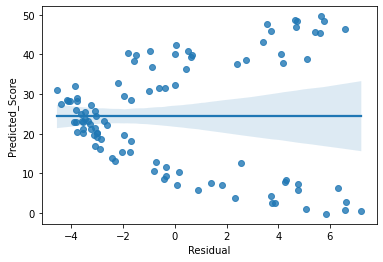

In [8]:
df['Predicted_Score'] = result.fittedvalues.copy()
df['Residual'] = df['Marks'] - df['Predicted_Score']
sns.regplot(x = df['Residual'], y = df['Predicted_Score'])

This is not constant varience. Here, we need to use the weighted linear regression. But, nonetheless let us use multiple linear regression model to see the difference  in the prediction through linear regressionn and multiple linear regression in the next version.

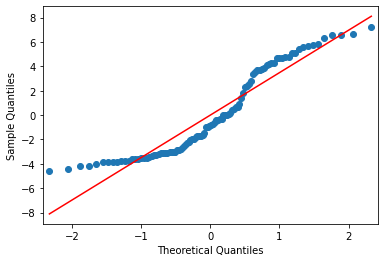

<AxesSubplot:xlabel='Residual', ylabel='Count'>

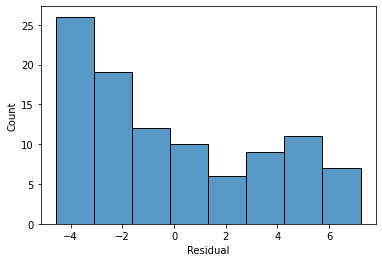

In [9]:
import statsmodels.api as sm
import pylab as py
sm.qqplot(df['Residual'],line ='s')
py.show()
sns.histplot(df['Residual'])

The above shown image is a normal quantile plot. The values does not exactly lie on the diagonal. From the histogram the distribution of residual seem to be a little skewed. Predictions made by MRM will not be very reliable.

Method 2 : Implementation of MRM by sklearn

In [10]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

In [11]:
regmodel = linear_model.LinearRegression() 

In [12]:
regmodel.fit(np.array(df[['number_courses','time_study']]).reshape(-1,2), np.array(df['Marks']).reshape(-1,1))

LinearRegression()

In [13]:
print('coeffcients = \n', regmodel.coef_)
print('Intercept = \n', regmodel.intercept_)

coeffcients = 
 [[1.86405074 5.39917879]]
Intercept = 
 [-7.45634623]


In [14]:
df['Predicted_Score'] = regmodel.predict(np.array(df[['number_courses', 'time_study']]).reshape(-1,2))

<AxesSubplot:xlabel='Residual', ylabel='Predicted_Score'>

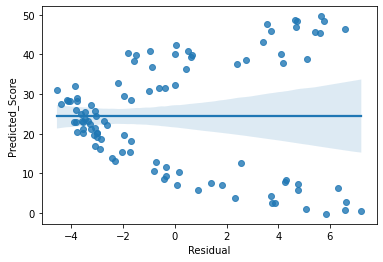

In [15]:
df['Residual'] = df['Marks'] - df['Predicted_Score']
sns.regplot(x = df['Residual'], y = df['Predicted_Score'])

In [16]:
print('RMSE = ', np.sqrt(mean_squared_error(np.array(df['Marks']).reshape(-1,1),np.array(df['Predicted_Score']).reshape(-1,1))) )
print('R2 = ', r2_score(np.array(df['Marks']).reshape(-1,1),np.array(df['Predicted_Score']).reshape(-1,1))) 

RMSE =  3.48094269833747
R2 =  0.9403656320238896


In [17]:
R2 =  r2_score(np.array(df['Marks']).reshape(-1,1),np.array(df['Predicted_Score']).reshape(-1,1))

In [18]:
R_bar2 = 1- (1 - R2)* ((df.shape[0] -1)/(df.shape[0] - 3)) 
print('Adjusted R2 = ',R_bar2)

Adjusted R2 =  0.939136057426444
